# Veoneeer ML
Steps to be performed:
    - load a car crash data
    - plot the signals and focus on the iteresting areas to identify the defirmation event

In [67]:
import random

import numpy as np
import matplotlib.pyplot as plt
import os

In [68]:
file_name = "Sensor_Export.001"
f_path = ".\\data\\" + file_name

In [69]:
print(f_path)
print(os.getcwd())

.\data\Sensor_Export.001
C:\Users\seu21\OneDrive\Documente\Projects\VeoneerML


In [70]:
data = np.loadtxt(f_path, skiprows = 1)
print(data[:10])

[-0.19832163 -0.00688463  0.08883337  0.18455237  0.08883337 -0.29404063
 -0.10260363 -0.10260363  0.47170837  0.28027037]


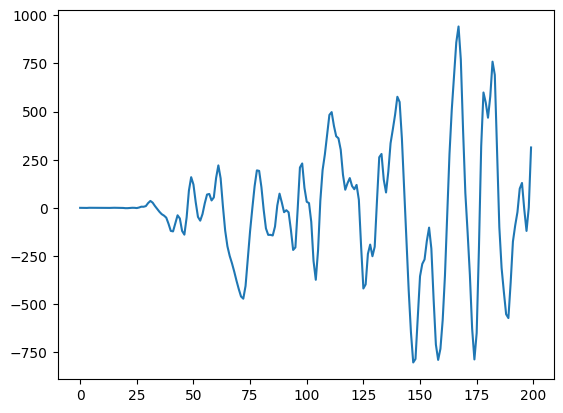

In [71]:
plt.plot(data[2000:2200])

In [72]:
# let's do some statistics on the signal
data_s = data[2000:2250]
d_min = np.min(data_s)
d_max = np.max(data_s)
d_std = np.std(data_s)
d_mean = np.mean(data_s)
print("min: {}, max: {}, std: {}, mean: {}".format(d_min, d_max, d_std, d_mean))

min: -1399.029056, max: 942.1506974, std: 373.2944218864745, mean: -50.552399524672126


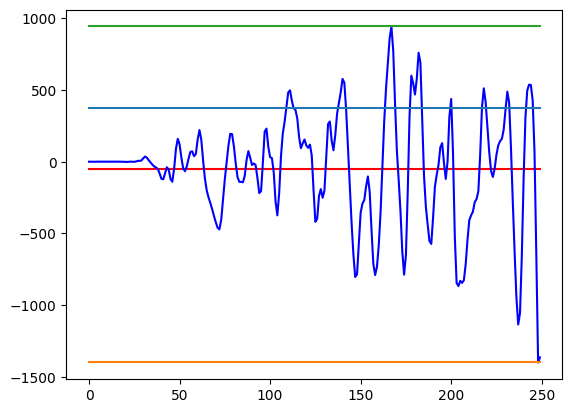

In [73]:
s_d_mean = np.ones(len(data_s))*d_mean
s_d_min = np.ones(len(data_s))*d_min
s_d_max = np.ones(len(data_s))*d_max
s_d_std = np.ones(len(data_s))*d_std

plt.plot(s_d_mean, c='r')
plt.plot(data_s, c='b')
plt.plot(s_d_std)
plt.plot(s_d_min)
plt.plot(s_d_max)
plt.show()

 we are reading acceleration values from the sensors.. let's transform them
 v = ds/dt, a = dv/dt, a = ds/kdt^2

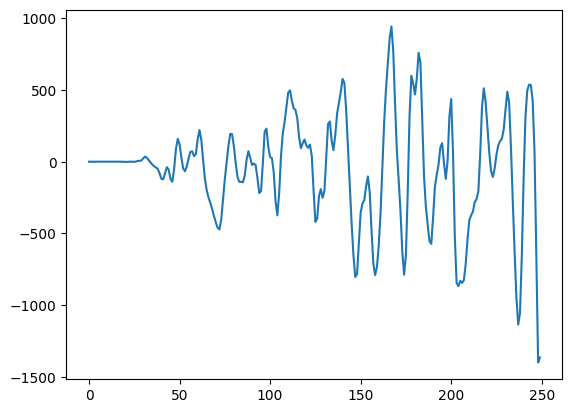

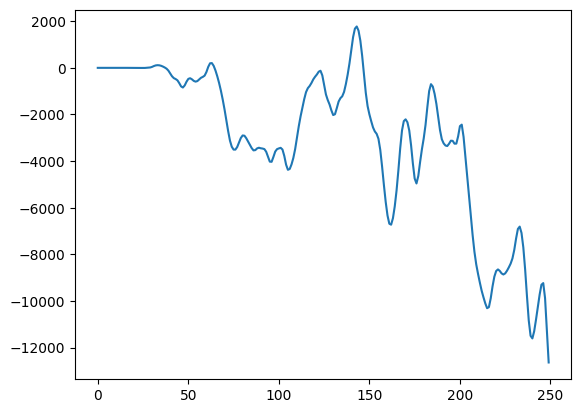

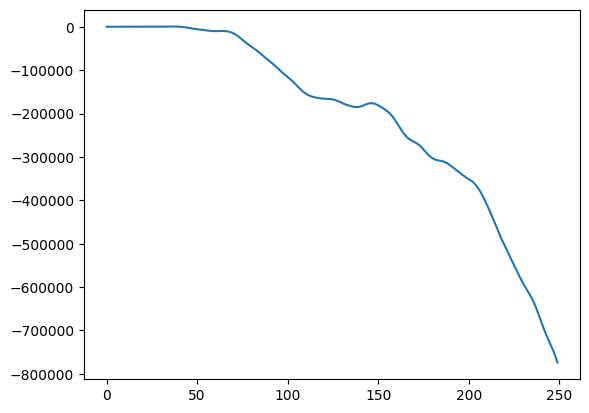

In [74]:
plt.plot(data_s)
plt.show()

i1_data = np.cumsum(data_s)
plt.plot(i1_data)
plt.show()

i2_data = np.cumsum(i1_data)
plt.plot(i2_data)

In [75]:
from scipy import signal


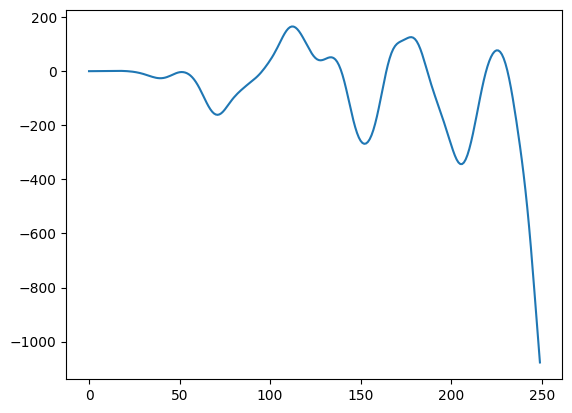

In [76]:
fs = 10000  # Hz
fc = 250  # Hz

b, a = signal.butter(2, fc, fs=fs)
data_filtered = signal.filtfilt(b, a, data_s)

plt.plot(data_filtered)

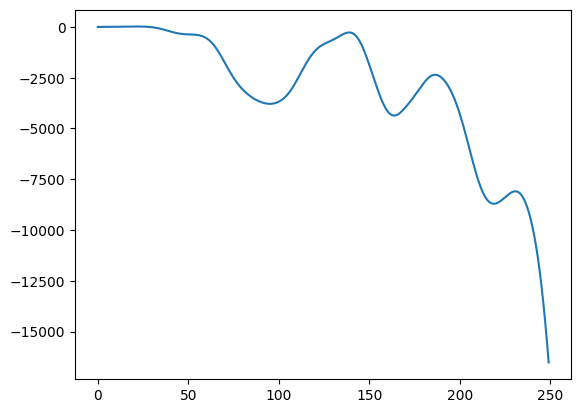

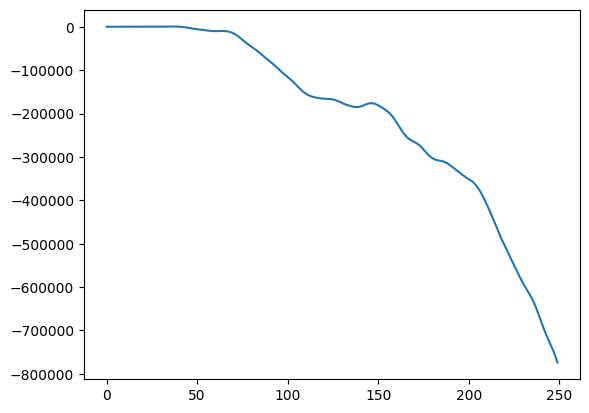

In [77]:
i1_data_filt = np.cumsum(data_filtered)
plt.plot(i1_data_filt)
plt.show()

i2_data_filt = np.cumsum(i1_data_filt)
plt.plot(i2_data)

# Spml 2
* create a syntetic data generator
    * generate a database with signals with/without anomalies
    * shape training data and results(x,y)
    * construct a ML model  to clasify using Keras
* Main takeaways:
    * how to construct a database for an Ml Model
    * usage of simple layer for data processing

# Create a simple sensor data validation system
generate some synthetic data
generate a simple dataset
create a ml model to test the data

In [78]:
import tensorflow as tf
from tensorflow import keras as k


In [161]:
synth_sig = np.random.normal(loc=0.01, scale=1, size=200)
synth_intro = np.zeros(shape=(50))

synth_data = np.append(synth_intro, synth_sig)

# design an anomaly
# ano_pos - where the anomaly happens
# ano_amp - signal intensity
# ano_rep - how many time it occurs
# ano_length - the duration of the anomaly
def rep_anno(sig_len, intro_len):
    #generates a random anomaly
    ano_pos = np.random.randint(low= intro_len + 30, high= sig_len- intro_len)
    ano_amp = np.random.randint(low= -3, high= +3)
    ano_len = np.random.randint(low= intro_len//10, high= sig_len//5)

    return ano_pos, ano_amp, ano_len

def generate_samples(sample_nr=10, ano_max_nr=2, sample_len=200):

    X = []
    y = []

    for _ in range(sample_nr):
            #signal data
            synth_sig = np.random.normal(loc=0.01, scale=1, size=sample_len)
            #signal intro
            synth_intro = np.zeros(shape=(50))


            synth_data = np.append(synth_intro, synth_sig)


            # 0 if the signal has no anomaly
            # 1 if the signal has an anomaly
            sign_good_or_bad = np.random.randint(0,2)
            # y - label
            y_local = sign_good_or_bad

            if sign_good_or_bad == 1:
                #creates random anomalies in range ano_rep
                ano_rep = np.random.randint(1,ano_max_nr+1)
                for _ in range(ano_rep):
                    ano_pos, ano_amp, ano_len = rep_anno(len(synth_sig), len(synth_intro))
                    ano_amp_data = np.ones(shape=(ano_len))*ano_amp
                    synth_data[ano_pos:ano_pos+ano_len] = ano_amp_data

            # data scaling
            synth_data = normalization(synth_data)

            y.append(y_local)
            X.append(synth_data)
    X = np.array(X)
    y = np.array(y)
    return X, y

X,y = generate_samples(300,3,300)
print(X.shape, y.shape, X[:10], y[:100])

#print(synth_data.shape)
#plt.plot(synth_data)

(300, 350) (300,) [[0.44942906 0.44942906 0.44942906 ... 0.22270571 0.17192036 0.66108761]
 [0.48304367 0.48304367 0.48304367 ... 0.25522025 0.63052953 0.43671542]
 [0.48170519 0.48170519 0.48170519 ... 0.55251551 0.32166851 0.54908297]
 ...
 [0.51328289 0.51328289 0.51328289 ... 0.39538222 0.43505495 0.42421132]
 [0.45963763 0.45963763 0.45963763 ... 0.50757057 0.55445877 0.42769364]
 [0.47864196 0.47864196 0.47864196 ... 0.35665313 0.35514962 0.81614721]] [1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1]


In [167]:
#dataset unbalanced

uX = []
uy = []
counter = 1
for i in range(X.shape[0]):
    #print(y[i])
    if counter % 2 == 0:
        if y[i] == 0:
            uX.append(X[i])
            uy.append(y[i])
    else:
         uX.append(X[i])
         uy.append(y[i])
    counter += 1
uX = np.array(uX)
uy = np.array(uy)
print("balanced data: ", np.sum(y[y>=1]) )
print("unbalanced data: ", np.sum(uy[uy>=1]) )



balanced data:  151
unbalanced data:  72


# We have a dataset that will be used for training
# training, validate, test splits

# need to do data scalling between 0 and 1, computer work better like this

In [103]:
#data scaling
def normalization(data):
    # scaling
    # find min then max of dataset and then rescale --> mapping
    data_min = np.min(data)
    data_max = np.max(data)
    #rescaling
    scaling = (data - data_min) / (data_max - data_min)
    return scaling

def standardization(data):
    #Z score
    data_mean = np.mean(data)
    data_std = np.std(data)
    scaling = (data - data_mean)/data_std
    return scaling


In [129]:
# X -> [N-batch size, 250], y -> [N,1]

#now create model to classify signals - neural network Functional Keras
#best practice: name every layer
sig_shape =  len(X[0])
print(sig_shape)

epochs = 100

#input layer: creates a symbolic tensor that gets our values from the database
data_in = k.Input(shape = (sig_shape,), name= "data_input")

#first layer
val = k.layers.Dense(units=100, name="dense1")(data_in)
#dropout layer
val = k.layers.Dropout(0.5)(val)
#second layer
val = k.layers.Dense(units=50, name="dense2")(val)
#output layer
out = k.layers.Dense(units=1, name="out", activation='sigmoid')(val)

#we need to assemble the model using k.Model
model = k.Model(inputs=data_in,outputs=out)

#need to also compile the model
#we use adam optimiser which a better version of stochastic gradient descent method which finds the global minimum
#when starting building a model from scratch adam is a very good choice, no need to set hyper-parametres
#to do a binary classification we use the binary crossentropy function: it tells how to calculate the output of the model
model.compile(optimizer=k.optimizers.Adam(),loss=k.losses.binary_crossentropy,metrics='accuracy')

#we can visualise the model using summary method
model.summary()

#train the model
#shuffle is used to introduce randomness so he have enough diversity in our data
hist = model.fit(x=X,y=y,epochs=epochs,shuffle=True, validation_split=0.2)



300
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_input (InputLayer)     [(None, 300)]             0         
                                                                 
 dense1 (Dense)              (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense2 (Dense)              (None, 50)                5050      
                                                                 
 out (Dense)                 (None, 1)                 51        
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================]

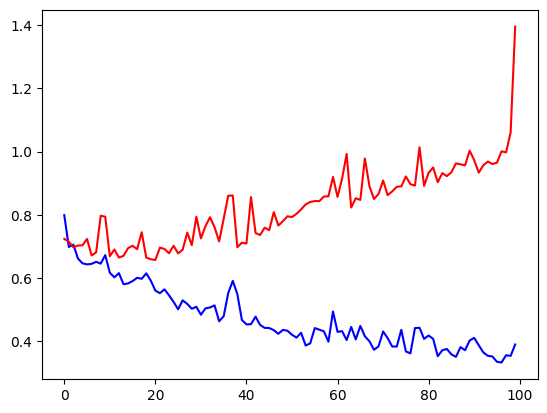

In [130]:
#plot the loss
plt.plot(hist.history['loss'], c='b')
plt.plot(hist.history['val_loss'], c='r')
#here we can wee that this model overfits, validation loss goes up while loss goes down

### Notes on model behaivour:
model is ```overfitting```, because the validation loss starts to increase

### what can we do to avoid overfitting?
1. to use more data for the training
2. use a more complex model( more layers)
3. dropout layer
4. early stop
5. optimizer change / parametrization
6. normalization / standardization
7. analyse the dataset ( balanced/ unbalanced dataset)

# SPLM 3

* objectives
    * scaleing the data
    * analyze underfitting/ overfitting effects
    * understand the data(balanced/unbalanced) effects
    * use the confusion matrix, understand the usage of the analyze with it
    * understand the detection restuls ACTUAL vs predicted results
    *

# evaluate 1st model results

In [131]:
model.evaluate(x=X,y=y)

16/16 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.6780


[0.7562110424041748, 0.6779999732971191]

In [99]:
test_data_X, test_data_y = generate_samples(100,3,250)
for _ in range(10):
    i = np.random.randint(0,100)
    signal_test = np.array([test_data_X[i]])
    ret = model.predict(x=signal_test,batch_size=1)
    print(ret, test_data_y[i])


# problem: the value is not between 0 and 1

1/1 [==============================] - 0s 64ms/step
[[0.7945579]] 1
1/1 [==============================] - 0s 23ms/step
[[0.93856114]] 1
1/1 [==============================] - 0s 22ms/step
[[0.10543641]] 0
1/1 [==============================] - 0s 23ms/step
[[0.7217071]] 0
1/1 [==============================] - 0s 21ms/step
[[0.9122284]] 1
1/1 [==============================] - 0s 26ms/step
[[0.97348404]] 1
1/1 [==============================] - 0s 24ms/step
[[0.7250819]] 1
1/1 [==============================] - 0s 19ms/step
[[0.39161065]] 1
1/1 [==============================] - 0s 29ms/step
[[0.32870233]] 1
1/1 [==============================] - 0s 21ms/step
[[0.26425552]] 0


# homework
1. make a more complex model, without overfitting the data, use sample number = 2500
2. use other optimizers, hyperparameter for optimizer
3. try to apply normalization / standarilzation to improve data
4. present your best model on the next meeting (accuracy >>)
5. use an unbalanced dataset and experiment the behaviour, count = 2, test your best model against it